In [ ]:
!sudo apt install cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono
  fonts-urw-base35 libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data t1utils
  tex-common texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc texlive-latex-recommended-doc
  texlive-luatex texlive-pstricks
The following

In [ ]:
!sudo apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-lato fonts-texgyre ghostscript libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java
  libpdfbox-java libruby3.0 preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration tex-gyre
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  ghostscript-x libavalon-framework-java libcommons-logging-java-doc
  libexcalibur-logkit-java liblog4j1.2-java ri ruby-dev bundler
  texlive-fonts-recommended-doc python3-pygments icc-profiles
  libfile-which-perl libspreadsheet-parseexcel-perl texlive-latex-extra-doc
  dot2tex prerex texlive-pictures-doc vprerex default-jre-headless tipa-doc
The following NEW packages will be installed:
  dvipng fonts-lato fonts-texgyre ghostscript libapache-pom-java
  libcommons-logging-java libcommons-parent-java l

In [ ]:
!pip install latex

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7589 sha256=cd30a7a17d7e2f3280ddfc2db17fcc285ba244f3762518fe6fc0b306aa4c0d35
  Stored in directory: /root/.cache/pip/wheels/7e/02/25/c00dfc203e8ba53dfc2e4e97d40e537263d6e03606681f3872
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7228 sha256=826eed67a94e36d913025b196c76aee650b67ad65cb809da7167ca18be5a1fff
  Stored in directory: /root/.cache/pip/wheels/d0/e8/fa/e253c256048ea58d99a8abb5e751abb6a838af6f12887b5418
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2766 sha256=406d4254fcb8f96285d21c84f4021ce8eaa2ed323635f84816c180dfaed1c2cc
  Stored in directory: /root/.cache/pip/wheels/75/1f/1c/0ecab7ceabad0b8e018891505911e82a6f358a0291e7681bae
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.w

In [ ]:
import math
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Function for t_rearr
def t_rearr(n):
    tau_t = 50e-6  # 50 microseconds
    a_p = 0.02e6  # 0.02 micrometers per microsecond squared
    d_p = 5e-6     # 5 micrometers
    L = math.sqrt(n)

    term1 = 2 * tau_t * math.log(L)
    term2 = (3 + 2 * math.sqrt(2)) * math.sqrt((6 * L * d_p) / a_p)

    t_rearr_approx = term1 + term2 # t_rearr is the same as t_r (time required to move the atomic qubits around for one rearrangement) in the paper
    return t_rearr_approx

# Function for R_L
def R_L(n, p_g):
    R_L_value = 0.07 * (p_g / 0.006) ** (0.47 * n ** 0.27)
    return R_L_value

# Function for R_S
def R_S(n_m, p_g):
    d_sc = math.sqrt(n_m) / 5
    R_S_value = 0.3 * (70 * p_g) ** ((d_sc + 1) / 2)
    return R_S_value

# Function for t_cyc
def t_cyc(n):
    return 8 * t_rearr(n)

# Function for R_0
def R_0(n_m, p_g):
    return 2 * (math.sqrt(n_m) / 5) * R_L(n_m, p_g)

# Function for R_1
def R_1(n_m, p_g):
    return 2 * (math.sqrt(n_m) / 5) * R_S(n_m, p_g)

# Function for R_2
def R_2(n_a, n_m, p_g):
    term1 = 2 * (math.sqrt(n_a)) * R_L(n_a, p_g)
    term2 = (math.sqrt(n_m) / 5) * (R_S(n_m, p_g) + R_L(n_a, p_g))
    term3 = (math.sqrt(n_m) / 5) * (R_L(n_a, p_g) + (n_m / 25) * R_L(n_m, p_g))
    return term1 + term2 + term3

# Function for T_2
def T_2(n_a, n_m):
    term1 = (math.sqrt(n_a)) * t_cyc(n_a)
    term2 = (math.sqrt(n_m) / 5) * t_cyc(n_a)
    term3 = (math.sqrt(n_m) / 5) * t_cyc(n_m)
    return (n_m / 25) * (term1 + term2 + term3)

# Function for R_3
def R_3(T_3, n_m, p_g):
    return (T_3 / t_cyc(n_m)) * R_L(n_m, p_g)

# Function for R_4
def R_4(n_a, n_m, p_g):
    term1 = (math.sqrt(n_m) / 5) * R_S(n_m, p_g)
    term2 = (math.sqrt(n_a)) * R_L(n_a, p_g)
    term3 = (math.sqrt(n_m) / 5) * (R_S(n_m, p_g) + R_L(n_a, p_g))
    term4 = (math.sqrt(n_m) / 5) * (R_L(n_a, p_g) + (n_m / 25) * R_L(n_m, p_g))
    term5 = R_S(n_m,p_g)
    return term1 + term2 + term3 + term4 + term5

# Function for T_4
def T_4(n_a, n_m, t_g):
    term1 = 6 * (math.sqrt(n_m) / 5) * t_g
    term2 = (math.sqrt(n_a)) * t_cyc(n_a)
    term3 = (math.sqrt(n_m) / 5) * t_cyc(n_a)
    term4 = (math.sqrt(n_m) / 5) * t_cyc(n_m)
    term5 = 6*t_g
    return (n_m / 25) * (term1 + term2 + term3 + term4 + term5)

# Function for T_tot
def T_tot(n_a, n_m, t_g, T_3):
    return T_2(n_a, n_m) + T_4(n_a, n_m, t_g) + T_3

# Function for R_store
def R_store(n_a, n_m, t_g, p_g, T_3):
    return 2 * (T_tot(n_a, n_m, t_g, T_3) / t_cyc(n_m)) * R_L(n_m, p_g)

# Function for R_unload
def R_unload(n_a, n_m, p_g):
    term1 = (math.sqrt(n_m) / 5) * R_S(n_m, p_g)
    term2 = (math.sqrt(n_a)) * R_L(n_a, p_g)
    term3 = (math.sqrt(n_m) / 5) * (R_S(n_m, p_g) + R_L(n_a, p_g))
    term4 = (math.sqrt(n_m) / 5) * (R_L(n_a, p_g) + (n_m / 25) * R_L(n_m, p_g))
    return 2 * (term1 + term2 + term3 + term4)

# Function for R_BM
def R_BM(n_m, p_g):
    return 4 * (math.sqrt(n_m) / 5) * R_S(n_m, p_g)

# Function for R_net
def R_net(n_a, n_m, T_3, t_g, p_g):
    R0 = R_0(n_m, p_g)
    R1 = R_1(n_m, p_g)
    R2 = R_2(n_a, n_m, p_g)
    R3 = R_3(T_3, n_m, p_g)
    R4 = R_4(n_a, n_m, p_g)
    return R0 + R1 + R2 + R3 + R4

# Function for R_tot
def R_tot(n_a, n_m, T_3, t_g, p_g):
    R_net_val = R_net(n_a, n_m, T_3, t_g, p_g)
    R_store_val = R_store(n_a, n_m, t_g, p_g, T_3)
    R_unload_val = R_unload(n_a, n_m, p_g)
    R_BM_val = R_BM(n_m, p_g)
    return R_BM_val + R_unload_val + R_store_val + 2 * R_net_val

# Function for logical bit-rate r_L
def r_L(n_m, t_g):
    return n_m / (25 * T_4(n_a, n_m, t_g))

# Function for number of blocks N
def N_blocks(r_e, n_m, t_g):
    return r_e / r_L(n_m, t_g)

# Function for total number of trucks N_truck_tot
def N_truck_tot(r_e, n_m, t_g, n_t, S):
    N = N_blocks(r_e, n_m, t_g)
    return (S * N) / (n_t/n_m)

# Example usage:
n_m = 60000  # Number of physical qubits in the qLDPC patch
n_a = n_m/25
T_3 = 5400   # Transit time of the truck in hours (multiplied by 3600 to give seconds)
t_g = 2e-6 # Gate time of the architecture in seconds
p_g = 0.001  # physical gate error rate
r_e = 2300  # target E-Bit rate that we want in Hz
n_t = 1000000  # Total number of physical qubits a train-car can carry
S = 5   # number of nodes i.e. qATM destinations

result_R_tot = R_tot(n_a, n_m, T_3, t_g, p_g)
print("Final Fidelity =", 1 - result_R_tot)

result_N_truck_tot = N_truck_tot(r_e, n_m, t_g, n_t, S)
print("Number of trucks or train cars per transit =", result_N_truck_tot)

print("Total Number of trucks needed: ",result_N_truck_tot*(T_2(n_a, n_m)+2*T_3+T_4(n_a, n_m, t_g))/T_4(n_a, n_m, t_g))

T_4(n_a, n_m, t_g)

Final Fidelity = 0.9181704243217061
Number of trucks or train cars per transit = 2169.564000426359
Total Number of trucks needed:  7443.714085351314


7546.309566700379

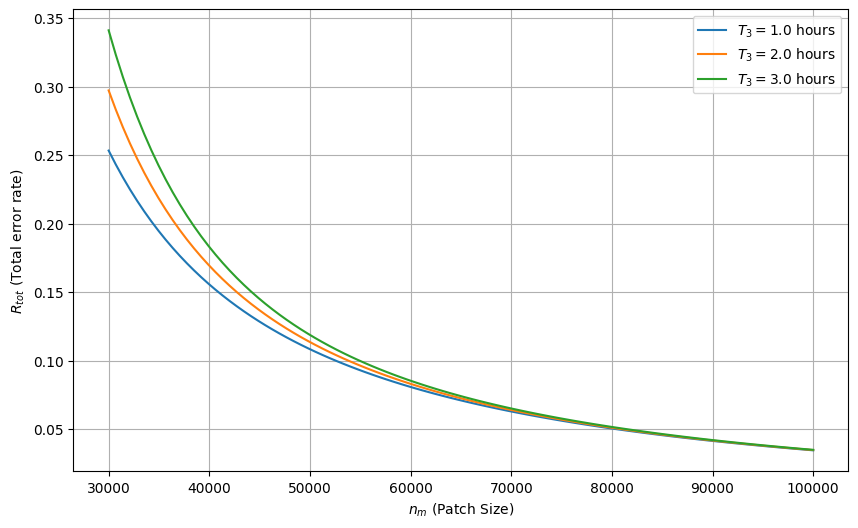

<ipython-input-6-24c782260e38>:38: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  T_3_solution, = fsolve(R_tot_fixed, T_3_initial_guess, args=(n_a, n_m, 2e-6, 0.001, R_target))


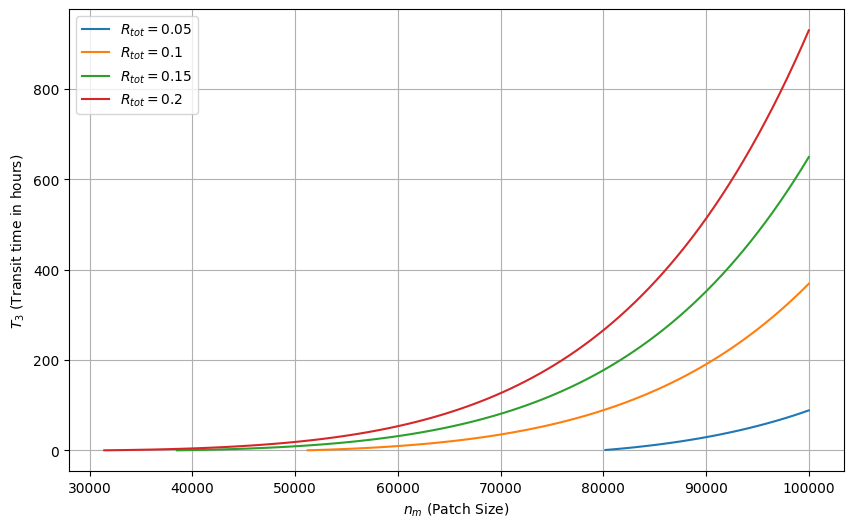

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def R_tot_fixed(T_3, n_a, n_m, t_g, p_g, R_target):
    R_net_val = R_net(n_a, n_m, T_3, t_g, p_g)
    R_store_val = R_store(n_a, n_m, t_g, p_g, T_3)
    R_unload_val = R_unload(n_a, n_m, p_g)
    R_BM_val = R_BM(n_m, p_g)
    return R_BM_val + R_unload_val + R_store_val + 2 * R_net_val - R_target

# Define the range of n_m values
n_m_values = np.linspace(30000, 100000, 100)

# Plot 1: n_m vs R_tot for different T_3
T_3_values = [1 * 3600, 2 * 3600, 3 * 3600]  # T_3 in seconds

plt.figure(figsize=(10, 6))
for T_3 in T_3_values:
    R_tot_values = [R_tot(n_m / 25, n_m, T_3, 2e-6, 0.001) for n_m in n_m_values]
    plt.plot(n_m_values, R_tot_values, label=f'$T_3 = {T_3 / 3600}$ hours')
plt.xlabel('$n_m$ (Patch Size)')
plt.ylabel('$R_{tot}$ (Total error rate)')
#plt.title('$n_m$ vs $R_{tot}$ for different $T_3$')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: n_m vs T_3 for different R_tot
R_tot_targets = [0.05, 0.1, 0.15, 0.2]  # Different R_tot values

plt.figure(figsize=(10, 6))
for R_target in R_tot_targets:
    T_3_solutions = []
    for n_m in n_m_values:
        n_a = n_m / 25
        T_3_initial_guess = 2 * 3600  # Initial guess for T_3 in seconds
        T_3_solution, = fsolve(R_tot_fixed, T_3_initial_guess, args=(n_a, n_m, 2e-6, 0.001, R_target))
        if T_3_solution > 0:
            T_3_solutions.append(T_3_solution / 3600)  # Convert to hours
        else:
            T_3_solutions.append(np.nan)  # Use NaN for invalid (negative) T_3 solutions
    plt.plot(n_m_values, T_3_solutions, label=f'$R_{{tot}} = {R_target}$')
plt.xlabel('$n_m$ (Patch Size)')
plt.ylabel('$T_3$ (Transit time in hours)')
#plt.title('$n_m$ vs $T_3$ for different $R_{tot}$')
plt.legend()
plt.grid(True)
plt.show()

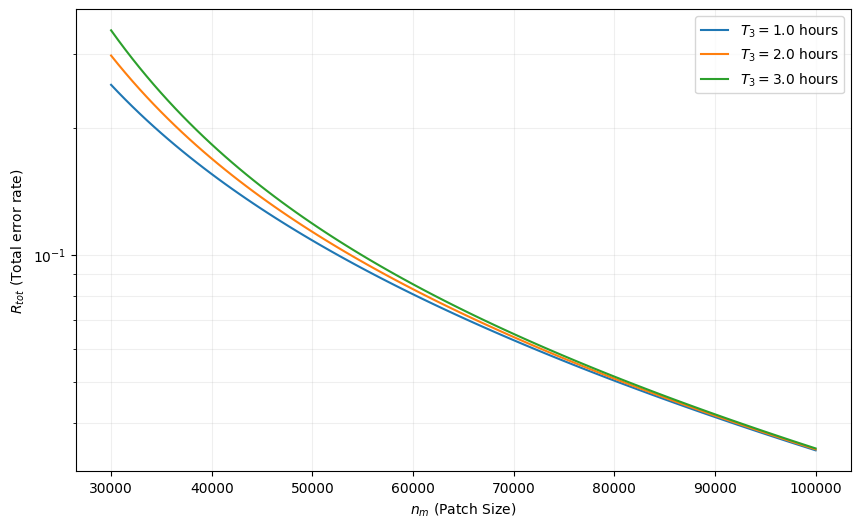

<ipython-input-7-02a525973901>:37: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  T_3_solution, = fsolve(R_tot_fixed, T_3_initial_guess, args=(n_a, n_m, 2e-6, 0.001, R_target))


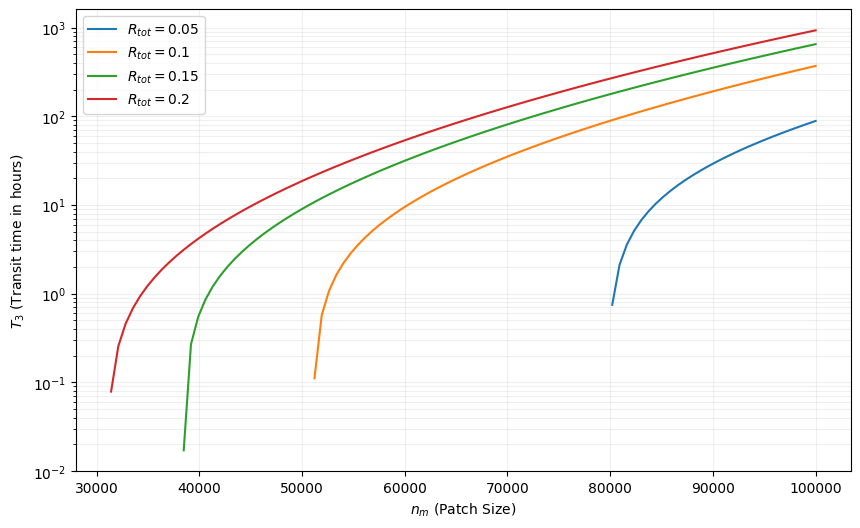

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def R_tot_fixed(T_3, n_a, n_m, t_g, p_g, R_target):
    R_net_val = R_net(n_a, n_m, T_3, t_g, p_g)
    R_store_val = R_store(n_a, n_m, t_g, p_g, T_3)
    R_unload_val = R_unload(n_a, n_m, p_g)
    R_BM_val = R_BM(n_m, p_g)
    return R_BM_val + R_unload_val + R_store_val + 2 * R_net_val - R_target

# Define the range of n_m values
n_m_values = np.linspace(30000, 100000, 100)

# Plot 1: n_m vs R_tot for different T_3 (semi-log scale)
T_3_values = [1 * 3600, 2 * 3600, 3 * 3600]  # T_3 in seconds

plt.figure(figsize=(10, 6))
for T_3 in T_3_values:
    R_tot_values = [R_tot(n_m / 25, n_m, T_3, 2e-6, 0.001) for n_m in n_m_values]
    plt.semilogy(n_m_values, R_tot_values, label=f'$T_3 = {T_3 / 3600}$ hours')
plt.xlabel('$n_m$ (Patch Size)')
plt.ylabel('$R_{tot}$ (Total error rate)')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

# Plot 2: n_m vs T_3 for different R_tot (semi-log scale)
R_tot_targets = [0.05, 0.1, 0.15, 0.2]  # Different R_tot values

plt.figure(figsize=(10, 6))
for R_target in R_tot_targets:
    T_3_solutions = []
    for n_m in n_m_values:
        n_a = n_m / 25
        T_3_initial_guess = 2 * 3600  # Initial guess for T_3 in seconds
        T_3_solution, = fsolve(R_tot_fixed, T_3_initial_guess, args=(n_a, n_m, 2e-6, 0.001, R_target))
        if T_3_solution > 0:
            T_3_solutions.append(T_3_solution / 3600)  # Convert to hours
        else:
            T_3_solutions.append(np.nan)  # Use NaN for invalid (negative) T_3 solutions
    plt.semilogy(n_m_values, T_3_solutions, label=f'$R_{{tot}} = {R_target}$')
plt.xlabel('$n_m$ (Patch Size)')
plt.ylabel('$T_3$ (Transit time in hours)')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

<ipython-input-16-5cc4dc055008>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 2 * (math.sqrt(n_m) / 5) * R_L(n_m, p_g)
<ipython-input-16-5cc4dc055008>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 2 * (math.sqrt(n_m) / 5) * R_S(n_m, p_g)
<ipython-input-16-5cc4dc055008>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d_sc = math.sqrt(n_m) / 5
<ipython-input-16-5cc4dc055008>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a sca

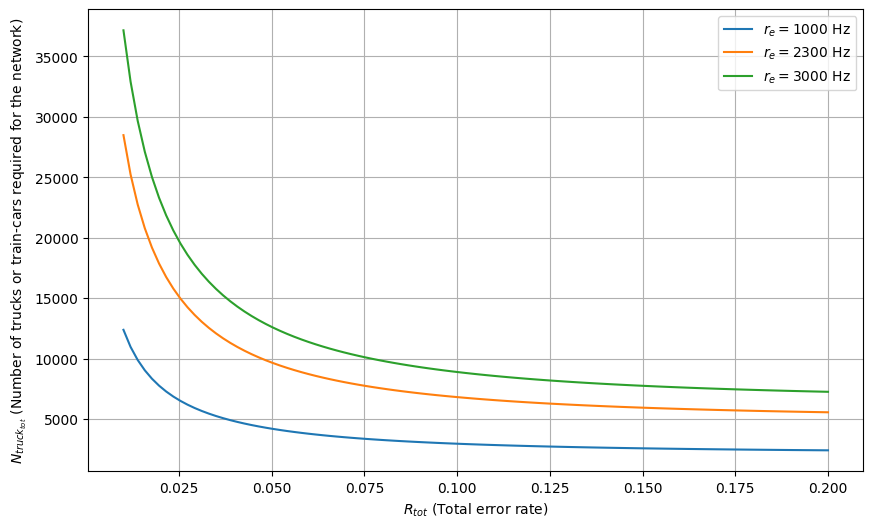

In [ ]:
# Function to calculate n_m for a given R_tot
def calc_n_m_for_R_tot(R_target):
    def equation(n_m):
        if n_m <= 0:
            return np.inf  # Return a large number to indicate invalid n_m
        n_a = n_m / 25
        return R_tot(n_a, n_m, T_3, t_g, p_g) - R_target

    n_m_initial_guess = 60000  # Initial guess for n_m
    n_m_solution, = fsolve(equation, n_m_initial_guess)
    return n_m_solution

# List of R_tot values from 0.01 to 0.2
R_tot_values = np.linspace(0.01, 0.2, 100)

# Different values of r_e to be plotted
r_e_values = [1000, 2300, 3000]  # Example values for r_e

plt.figure(figsize=(10, 6))

# Calculate and plot for each r_e value
for r_e in r_e_values:
    # Lists to store the results
    n_m_values = []
    N_truck_tot_values = []

    # Calculate n_m and N_truck_tot for each R_tot
    for R_target in R_tot_values:
        try:
            n_m = calc_n_m_for_R_tot(R_target)
            if n_m <= 0:
                continue  # Skip invalid n_m values
            N_truck_tot_value = N_truck_tot(r_e, n_m, t_g, n_t, S)*(T_2(n_m/25, n_m)+2*T_3+T_4(n_m/25, n_m, t_g))/T_4(n_m/25, n_m, t_g)
            n_m_values.append(n_m)
            N_truck_tot_values.append(N_truck_tot_value)
        except (ValueError, RuntimeError):
            continue  # Skip values that cause calculation errors

    # Plotting the results
    plt.plot(R_tot_values[:len(N_truck_tot_values)], N_truck_tot_values, label=f'$r_e = {r_e}$ Hz')

plt.xlabel('$R_{tot}$ (Total error rate)')
plt.ylabel('$N_{truck_{tot}}$ (Number of trucks or train-cars required for the network)')
#plt.title('$R_{tot}$ vs $N_{truck_{tot}}$ for different $r_e$ values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Surface Codes Only:

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import math

# Parameters
p_g = 0.001
t_g = 2e-6
r_e = 2300
S = 5
n_t = 1000000
T_3s = 5400
n_ms = 257

# Functions for Surface Code LFR and related calculations
def R_ss(n_ms):
    return 0.3 * (70 * p_g) ** ((math.sqrt(n_ms) + 1) / 2)

def R_1s(n_ms):
    return 2 * math.sqrt(n_ms) * R_ss(n_ms)

def T_1s(n_ms):
    return 6 * t_g * math.sqrt(n_ms)

def R_3s(n_ms, T_3s):
    return (T_3s / (6 * t_g)) * R_ss(n_ms)

def R_nets(n_ms, T_3s):
    return R_1s(n_ms) + R_3s(n_ms, T_3s) + R_ss(n_ms)

def T_tots(n_ms, T_3s):
    return T_1s(n_ms) + T_3s + 6*t_g

def R_stores(n_ms, T_3s):
    return 2 * (T_tots(n_ms, T_3s) / (6 * t_g)) * R_ss(n_ms)

def R_BMs(n_ms):
    return 4 * math.sqrt(n_ms) * R_ss(n_ms)

def R_tots(n_ms, T_3s):
    return R_BMs(n_ms) + R_stores(n_ms, T_3s) + 2 * R_nets(n_ms, T_3s)

def N_truck_tot_s(r_e, n_ms, n_t, S):
    return (S * r_e) / (n_t / n_ms)


result_R_tots = R_tots(n_ms,T_3s)
print("Final Fidelity =", 1 - result_R_tots)

result_N_truck_tots = N_truck_tot_s(r_e, n_ms, n_t, S)
print("Number of trucks or train cars per second =", result_N_truck_tots)

print("total trucks needed: ",result_N_truck_tots*(T_tots(n_ms,T_3s) + T_3s))

Final Fidelity = 0.9209868484591346
Number of trucks or train cars per second = 2.9555
total trucks needed:  31919.400604029233


<ipython-input-9-c2aaba47d864>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 4 * math.sqrt(n_ms) * R_ss(n_ms)
<ipython-input-9-c2aaba47d864>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 0.3 * (70 * p_g) ** ((math.sqrt(n_ms) + 1) / 2)
<ipython-input-9-c2aaba47d864>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 6 * t_g * math.sqrt(n_ms)
<ipython-input-9-c2aaba47d864>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a s

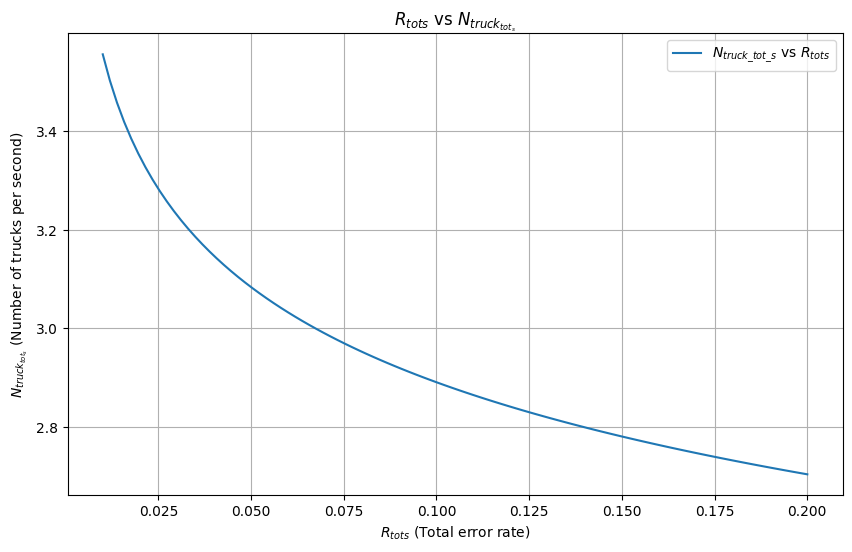

In [ ]:
# Function to calculate n_ms for a given R_tots
def calc_n_ms_for_R_tots(R_target, T_3s):
    def equation(n_ms):
        if n_ms <= 0:
            return np.inf  # Return a large number to indicate invalid n_ms
        return R_tots(n_ms, T_3s) - R_target

    n_ms_initial_guess = 200  # Initial guess for n_ms
    n_ms_solution, = fsolve(equation, n_ms_initial_guess)
    return n_ms_solution

# List of R_tots values from 0.01 to 0.2
R_tots_values = np.linspace(0.01, 0.2, 100)

# Lists to store the results
n_ms_values = []
N_truck_tot_s_values = []

# Calculate n_ms and N_truck_tot_s for each R_tots
for R_target in R_tots_values:
    try:
        n_ms = calc_n_ms_for_R_tots(R_target, T_3s)
        if n_ms <= 0:
            continue  # Skip invalid n_ms values
        N_truck_tot_s_value = N_truck_tot_s(r_e, n_ms, n_t, S)
        n_ms_values.append(n_ms)
        N_truck_tot_s_values.append(N_truck_tot_s_value)
    except (ValueError, RuntimeError):
        continue  # Skip values that cause calculation errors

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(R_tots_values[:len(N_truck_tot_s_values)], N_truck_tot_s_values, label='$N_{truck\\_tot\\_s}$ vs $R_{tots}$')
plt.xlabel('$R_{tots}$ (Total error rate)')
plt.ylabel('$N_{truck_{tot_{s}}}$ (Number of trucks per second)')
plt.title('$R_{tots}$ vs $N_{truck_{tot_{s}}}$')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-5-5cc4dc055008>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 2 * (math.sqrt(n_m) / 5) * R_L(n_m, p_g)
<ipython-input-5-5cc4dc055008>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 2 * (math.sqrt(n_m) / 5) * R_S(n_m, p_g)
<ipython-input-5-5cc4dc055008>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d_sc = math.sqrt(n_m) / 5
<ipython-input-5-5cc4dc055008>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar 

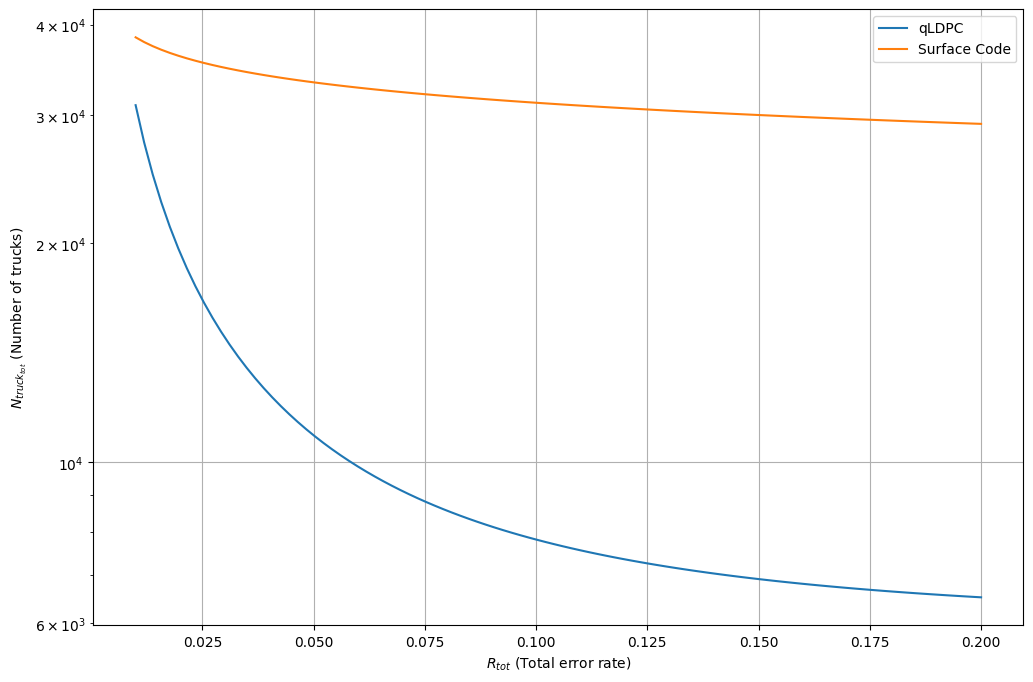

In [ ]:
# Parameters
p_g = 0.001
t_g = 2e-6
r_e = 2300  # Hz
S = 5
n_t = 1000000
T_3 = 5400

# Function to calculate n_m for a given R_tot (qLDPC)
def calc_n_m_for_R_tot(R_target):
    def equation(n_m):
        if n_m <= 0:
            return np.inf
        n_a = n_m / 25
        return R_tot(n_a, n_m, T_3, t_g, p_g) - R_target
    n_m_initial_guess = 40000
    n_m_solution, = fsolve(equation, n_m_initial_guess)
    return n_m_solution

# Function to calculate n_ms for a given R_tots (Surface code)
def calc_n_ms_for_R_tots(R_target):
    def equation(n_ms):
        if n_ms <= 0:
            return np.inf
        return R_tots(n_ms, T_3) - R_target
    n_ms_initial_guess = 200
    n_ms_solution, = fsolve(equation, n_ms_initial_guess)
    return n_ms_solution

# List of R_tot values from 0.01 to 0.2
R_tot_values = np.linspace(0.01, 0.2, 100)

# Lists to store the results for qLDPC
n_m_values = []
N_truck_tot_values = []

# Lists to store the results for Surface code
n_ms_values = []
N_truck_tot_s_values = []

# Calculate for qLDPC
for R_target in R_tot_values:
    try:
        n_m = calc_n_m_for_R_tot(R_target)
        if n_m <= 0:
            continue
        N_truck_tot_value = N_truck_tot(r_e, n_m, t_g, n_t, S)
        n_m_values.append(n_m)
        N_truck_tot_values.append(N_truck_tot_value*(T_2(n_m/25, n_m)+2*T_3+T_4(n_m/25, n_m, t_g))/T_4(n_m/25, n_m, t_g))
    except (ValueError, RuntimeError):
        continue

# Calculate for Surface code
for R_target in R_tot_values:
    try:
        n_ms = calc_n_ms_for_R_tots(R_target)
        if n_ms <= 0:
            continue
        N_truck_tot_s_value = N_truck_tot_s(r_e, n_ms, n_t, S)
        n_ms_values.append(n_ms)
        N_truck_tot_s_values.append(N_truck_tot_s_value*(T_tots(n_ms,T_3s) + T_3s))
    except (ValueError, RuntimeError):
        continue

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(R_tot_values[:len(N_truck_tot_values)], N_truck_tot_values, label='qLDPC')
plt.plot(R_tot_values[:len(N_truck_tot_s_values)], N_truck_tot_s_values, label='Surface Code')
plt.xlabel('$R_{tot}$ (Total error rate)')
plt.ylabel('$N_{truck_{tot}}$ (Number of trucks)')
#plt.title('$R_{tot}$ vs $N_{truck_{tot}}$ for qLDPC and Surface Code ($r_e = 2300$ Hz)')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Using log scale for y-axis due to large range of values
plt.show()